# 50 STARTUPS ANALYSIS

In [2]:
# importing the packages--
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [3]:
# reading the data file--
def read_data():
    data=pd.read_csv("C:/ANKITA/ASSIGNMENTS/Day 21 - 14th May/Multiple Linear Regression/Assignment 1/50_Startups.csv")
    return data

In [4]:
# calling the function--
data= read_data()
print(data.head(5))

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [5]:
# renaming the columns--
data=data.rename({ "R&D Spend":'R&D',"Marketing Spend":'marketing',"Administration":"administration","State":"state","Profit":"profit"},axis=1)
print(data.head(5))

         R&D  administration  marketing       state     profit
0  165349.20       136897.80  471784.10    New York  192261.83
1  162597.70       151377.59  443898.53  California  191792.06
2  153441.51       101145.55  407934.54     Florida  191050.39
3  144372.41       118671.85  383199.62    New York  182901.99
4  142107.34        91391.77  366168.42     Florida  166187.94


In [6]:
# checking the missing values--
data.isnull().sum()

R&D               0
administration    0
marketing         0
state             0
profit            0
dtype: int64

In [7]:
# printing basic info about the data--
print(data.columns)
print("Data types---")
print("==========================")
print(data.dtypes)
print("==========================")
print("Info---")
print(data.info())
print("==========================")

Index(['R&D', 'administration', 'marketing', 'state', 'profit'], dtype='object')
Data types---
R&D               float64
administration    float64
marketing         float64
state              object
profit            float64
dtype: object
Info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   R&D             50 non-null     float64
 1   administration  50 non-null     float64
 2   marketing       50 non-null     float64
 3   state           50 non-null     object 
 4   profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [8]:
print("Average spend on R&D:")
print(data["R&D"].mean())
print("==========================")
print("Average spend on administration:")
print(data["administration"].mean())
print("==========================")
print("Average spend on marketing:")
print(data["marketing"].mean())
print("==========================")
print("Average profit earned:")
print(data["profit"].mean())
print("==========================")

Average spend on R&D:
73721.6156
Average spend on administration:
121344.63960000001
Average spend on marketing:
211025.09780000002
Average profit earned:
112012.63920000002


In [9]:
lb= LabelEncoder()
data["state"]=lb.fit_transform(data["state"])

In [10]:
print(data.head())
print(data.dtypes)

         R&D  administration  marketing  state     profit
0  165349.20       136897.80  471784.10      2  192261.83
1  162597.70       151377.59  443898.53      0  191792.06
2  153441.51       101145.55  407934.54      1  191050.39
3  144372.41       118671.85  383199.62      2  182901.99
4  142107.34        91391.77  366168.42      1  166187.94
R&D               float64
administration    float64
marketing         float64
state               int32
profit            float64
dtype: object


# Exploratory Data Analysis

<Axes: >

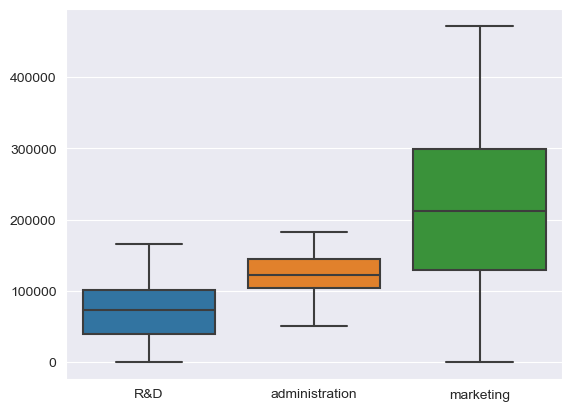

In [11]:
# checking the outliers--
sns.boxplot(data=data.loc[:, ['R&D', 'administration','marketing']],palette="tab10")

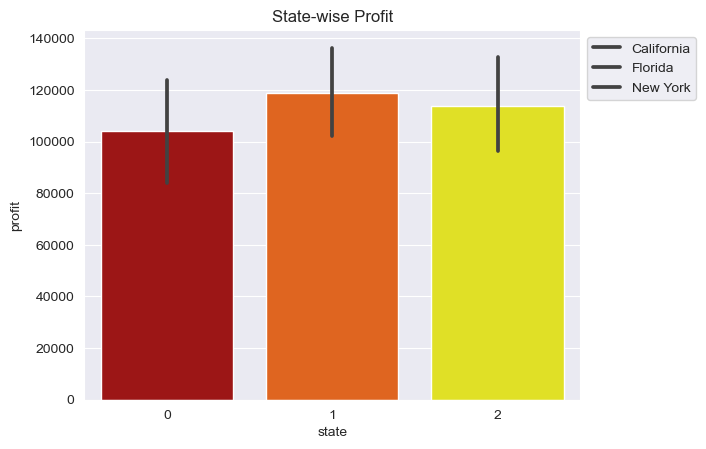

In [12]:
## statewise profit--
ax=sns.barplot(x=data["state"],y=data["profit"],data=data,palette="hot")
plt.title("State-wise Profit")
ax.legend( bbox_to_anchor=(1,1),labels=["California","Florida","New York"])

Text(0.5, 1.0, 'Statewise profit percentages')

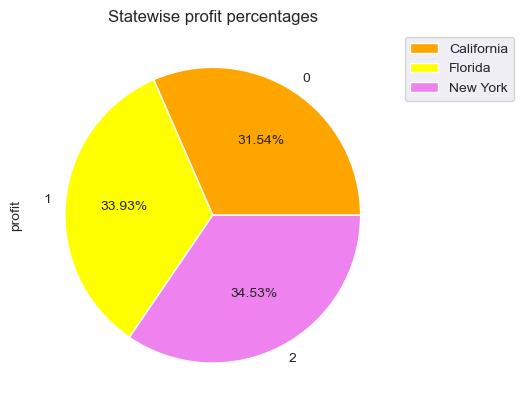

In [13]:
ax=data.groupby(["state"])["profit"].sum().plot(kind="pie",colors=['orange','yellow','violet'],autopct='%.2f%%')
ax.legend( bbox_to_anchor=(1,1),labels=["California","Florida","New York"])
plt.title("Statewise profit percentages")

Text(0.5, 1.0, 'R&D Spend VS Profit')

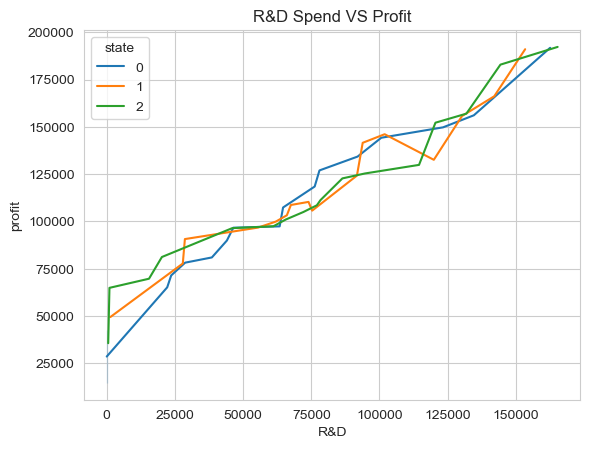

In [17]:
sns.set_style("whitegrid")
sns.lineplot(x="R&D",y="profit",data=data,hue="state",palette='tab10')
plt.title("R&D Spend VS Profit")

Text(0.5, 1.0, 'Administration Spend VS Profit')

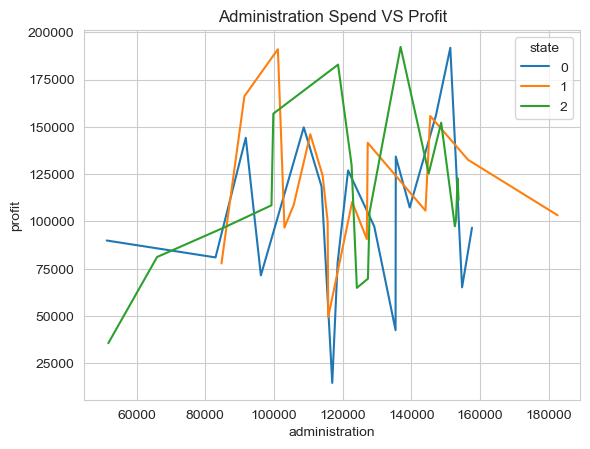

In [15]:
sns.set_style("whitegrid")
sns.lineplot(x="administration",y="profit",data=data,hue="state",palette= 'tab10')
plt.title("Administration Spend VS Profit")

Text(0.5, 1.0, 'Marketing Spend VS Profit')

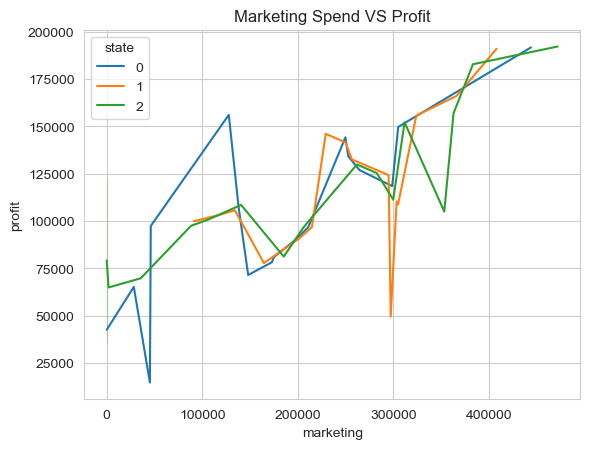

In [16]:
sns.set_style("whitegrid")
sns.lineplot(x="marketing",y="profit",data=data,hue="state",palette="tab10")
plt.title("Marketing Spend VS Profit")

<Axes: >

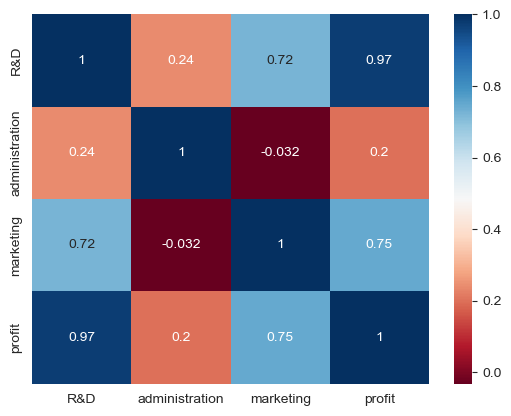

In [18]:
sns.heatmap(data[["R&D","administration","marketing","profit"]].corr(),annot=True,cmap="RdBu")

# Linear Regression

### Prediction model for profit of 50 startups data

In [18]:
# multiple linear regression--
df=data[["R&D","administration","marketing","profit"]]
print(df.head())

         R&D  administration  marketing     profit
0  165349.20       136897.80  471784.10  192261.83
1  162597.70       151377.59  443898.53  191792.06
2  153441.51       101145.55  407934.54  191050.39
3  144372.41       118671.85  383199.62  182901.99
4  142107.34        91391.77  366168.42  166187.94


In [19]:
df.shape

(50, 4)

In [22]:
# sampling of data--
training,testing=train_test_split(df,test_size=0.2)
training.head()

,R&D,administration,marketing,profit
45,1000.23,124153.04,1903.93,64926.08
8,120542.52,148718.95,311613.29,152211.77
40,28754.33,118546.05,172795.67,78239.91
3,144372.41,118671.85,383199.62,182901.99
35,46014.02,85047.44,205517.64,96479.51


In [23]:
testing.head()

,R&D,administration,marketing,profit
27,72107.60,127864.55,353183.81,105008.31
37,44069.95,51283.14,197029.42,89949.14
39,38558.51,82982.09,174999.30,81005.76
24,77044.01,99281.34,140574.81,108552.04
23,67532.53,105751.03,304768.73,108733.99


In [24]:
training.shape,testing.shape

((40, 4), (10, 4))

In [25]:
# defining--
X_train=training[["R&D","administration","marketing"]]
y_train=training["profit"]

In [26]:
model=LinearRegression()
print(model)

LinearRegression()


In [27]:
train_model=model.fit(X_train,y_train)
print("Model training is completed")
print(train_model)

Model training is completed
LinearRegression()


In [29]:
print(model.coef_)
print(model.intercept_)

[ 0.80060183 -0.03659059  0.03086185]
51565.78100823757


In [33]:
RD =76253.86
administration=113867.30
marketing=298664.47
y =0.80733789*RD -0.02881059*administration+ 0.02881124*marketing + 50343.43195926117
print("Profit earned with R&D spend of {},administration spend of {} and marketing spend of {} is {} ".format(RD,administration,marketing,y))

Profit earned with R&D spend of 76253.86,administration spend of 113867.3 and marketing spend of 298664.47 is 117230.37202595237 


<Axes: xlabel='R&D', ylabel='profit'>

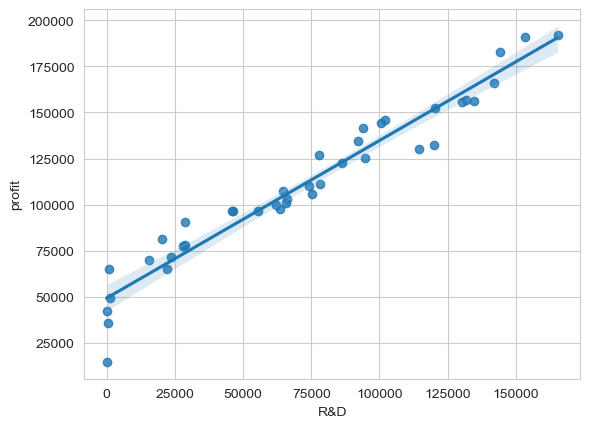

In [34]:
sns.regplot(x="R&D",y="profit",data=training)

<Axes: xlabel='administration', ylabel='profit'>

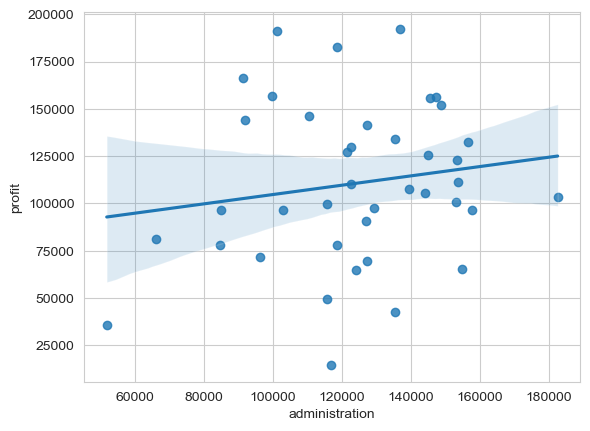

In [35]:
sns.regplot(x="administration",y="profit",data=training)

<Axes: xlabel='marketing', ylabel='profit'>

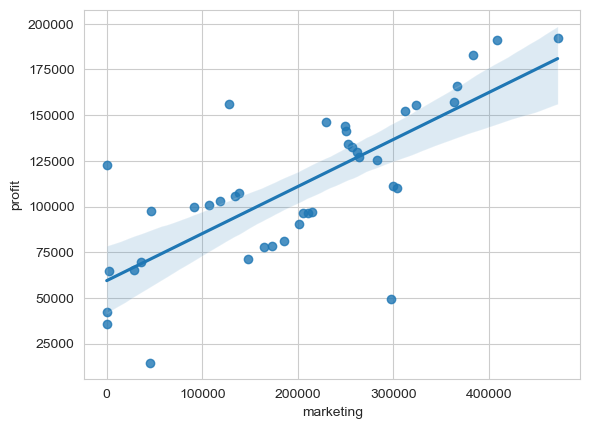

In [36]:
sns.regplot(x="marketing",y="profit",data=training)

In [37]:
X_test=testing[["R&D","administration","marketing"]]
X_test

,R&D,administration,marketing
27,72107.60,127864.55,353183.81
37,44069.95,51283.14,197029.42
39,38558.51,82982.09,174999.30
24,77044.01,99281.34,140574.81
23,67532.53,105751.03,304768.73
18,91749.16,114175.79,294919.57
9,123334.88,108679.17,304981.62
31,61136.38,152701.92,88218.23
1,162597.70,151377.59,443898.53
20,76253.86,113867.30,298664.47


In [38]:
pred_profit=train_model.predict(X_test)
pred_profit

array([115516.52642945,  91052.47698744,  84800.23449694, 113952.99361369,
       111168.68448209, 129944.33259558, 155743.57599719,  97646.80437338,
       189902.33496967, 117665.62940374])

In [39]:
testing["pred_profit"]=pred_profit
testing

,R&D,administration,marketing,profit,pred_profit
27,72107.60,127864.55,353183.81,105008.31,115516.526429
37,44069.95,51283.14,197029.42,89949.14,91052.476987
39,38558.51,82982.09,174999.30,81005.76,84800.234497
24,77044.01,99281.34,140574.81,108552.04,113952.993614
23,67532.53,105751.03,304768.73,108733.99,111168.684482
18,91749.16,114175.79,294919.57,124266.90,129944.332596
9,123334.88,108679.17,304981.62,149759.96,155743.575997
31,61136.38,152701.92,88218.23,97483.56,97646.804373
1,162597.70,151377.59,443898.53,191792.06,189902.334970
20,76253.86,113867.30,298664.47,118474.03,117665.629404


In [40]:
testing["Error"]=testing["profit"]-testing["pred_profit"]
testing

,R&D,administration,marketing,profit,pred_profit,Error
27,72107.60,127864.55,353183.81,105008.31,115516.526429,-10508.216429
37,44069.95,51283.14,197029.42,89949.14,91052.476987,-1103.336987
39,38558.51,82982.09,174999.30,81005.76,84800.234497,-3794.474497
24,77044.01,99281.34,140574.81,108552.04,113952.993614,-5400.953614
23,67532.53,105751.03,304768.73,108733.99,111168.684482,-2434.694482
18,91749.16,114175.79,294919.57,124266.90,129944.332596,-5677.432596
9,123334.88,108679.17,304981.62,149759.96,155743.575997,-5983.615997
31,61136.38,152701.92,88218.23,97483.56,97646.804373,-163.244373
1,162597.70,151377.59,443898.53,191792.06,189902.334970,1889.725030
20,76253.86,113867.30,298664.47,118474.03,117665.629404,808.400596


In [41]:
round(r2_score(testing['profit'],testing['pred_profit'])*100,2)

97.52

<Axes: xlabel='R&D', ylabel='profit'>

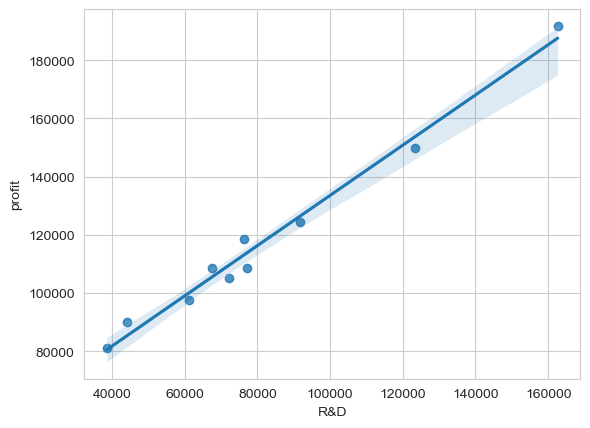

In [42]:
sns.regplot(x="R&D",y="profit",data=testing)

<Axes: xlabel='administration', ylabel='profit'>

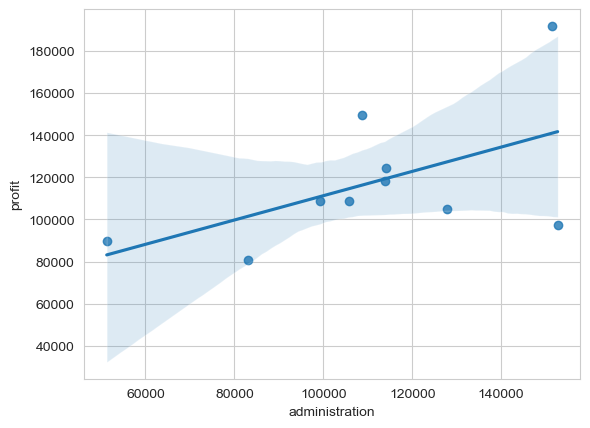

In [43]:
sns.regplot(x="administration",y="profit",data=testing)

<Axes: xlabel='marketing', ylabel='profit'>

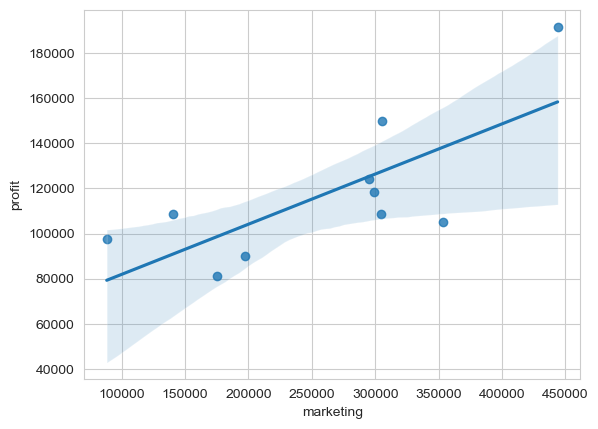

In [44]:
sns.regplot(x="marketing",y="profit",data=testing)